
---

# 🧠 What is Word Embedding?

---

## 👶 Simple Definition:

> Word Embedding is a way to **convert words into numbers** — but in a **smart** way.

It’s like giving **each word** a **special fingerprint** made of numbers 🧬 so the computer can understand **meaning**, not just characters.

---

## ⚠️ Why Can't We Just Use Regular Numbers?

Say we map:

```
"cat" → 1  
"dog" → 2  
"car" → 3
```

The problem is:
🚫 These numbers don’t show any **relationship** between words.

* Is **cat close to dog**? The computer doesn’t know. 😐
* It thinks “cat” and “car” are equally different.

✅ We need a system that **captures meaning and similarity**.

---

# 🎯 Enter: Word Embeddings

Word Embedding turns each word into a **vector** (a list of numbers), like this:

| Word | Vector (simplified example) |
| ---- | --------------------------- |
| cat  | \[0.2, 0.1, 0.7]            |
| dog  | \[0.3, 0.1, 0.65]           |
| car  | \[0.9, 0.2, 0.1]            |

Notice:

* **Cat** and **dog** vectors are **similar**
* **Car** is different

✅ That’s what we want — **semantic meaning encoded in numbers**

---

# 📌 Embedding vs One-Hot Encoding

| Feature          | One-Hot Encoding             | Word Embedding                        |
| ---------------- | ---------------------------- | ------------------------------------- |
| Shape            | Very large (1 for each word) | Small (like 100–300 numbers per word) |
| Similarity Info  | ❌ No similarity info         | ✅ Encodes word meanings               |
| Space Efficient? | ❌ No                         | ✅ Yes                                 |

---

# 🔬 How Word Embeddings Learn

During training, the model learns to give:

* **Similar vectors to similar words**
* **Different vectors to different words**

### 🎓 Examples:

| Word 1 | Word 2 | Distance |
| ------ | ------ | -------- |
| king   | queen  | close ✅  |
| king   | banana | far ❌    |
| big    | large  | close ✅  |

---

# 🧪 Types of Word Embeddings

| Type                          | Description                               |
| ----------------------------- | ----------------------------------------- |
| **Word2Vec**                  | Learns word meaning from context (Google) |
| **GloVe**                     | Learns from global word counts (Stanford) |
| **FastText**                  | Includes word sub-parts (Facebook)        |
| **Trainable Embedding Layer** | Learn embeddings during training          |

---

# 📐 Example in Code (Keras Embedding Layer)

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

model = Sequential([
    Embedding(input_dim=10000, output_dim=300, input_length=100)
])
```

| Parameter      | Meaning                                 |
| -------------- | --------------------------------------- |
| `input_dim`    | Size of your vocabulary                 |
| `output_dim`   | Size of the embedding vector (e.g. 300) |
| `input_length` | Length of the input sequence            |

---

# 🧠 Cool Properties

Word embeddings **capture relationships**:

```
king - man + woman ≈ queen
```

These are called **vector arithmetic of meaning** — and yes, it really works!

---

# 🧠 TL;DR Summary

| Concept             | Meaning                                     |
| ------------------- | ------------------------------------------- |
| Word Embedding      | Smart vector representation of words        |
| Purpose             | Let computers "understand" word meaning     |
| Output              | Each word = dense vector (e.g., 300 floats) |
| Similarity Encoding | Yes ✅                                       |
| Used In             | NLP, chatbots, translation, sentiment, etc  |

---

# 👁️ Real-Life Analogy

Think of words as **colors**.
One-hot encoding is like labeling them “Color 1, Color 2...”
❌ Doesn’t tell you **which ones are similar**.

Word embeddings are like mixing **real RGB values**:

* Red and pink are close
* Red and green are far

✅ They **capture relationships** and **meaning**

---



In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [28]:
reviews = ['nice food',
'amazing restaurant',
'too good',
'just loved it!',
'will go again',
'horrible food',
'never go there',
'poor service',
'poor quality',
'needs improvement']

sentiment = np.array([1,1,1,1,1,0,0,0,0,0])

In [29]:
one_hot("amazing restaurant", 30) # Sentence ; hightest value (30)

[19, 13]

In [30]:
for d in reviews:
    print(d)

nice food
amazing restaurant
too good
just loved it!
will go again
horrible food
never go there
poor service
poor quality
needs improvement


In [49]:
vocab_size = 50
encoded_reviews = [one_hot(d,vocab_size) for d in reviews]
encoded_reviews

[[35, 31],
 [9, 38],
 [40, 34],
 [44, 27, 30],
 [12, 37, 10],
 [46, 31],
 [31, 37, 43],
 [37, 45],
 [37, 47],
 [15, 17]]

**Here look some sentences are two words long some are three and four so in order to make all of them align equal we will do padding**

In [50]:
max_length = 4
padding_reviews = pad_sequences(encoded_reviews,maxlen=max_length,padding='post')
padding_reviews

array([[35, 31,  0,  0],
       [ 9, 38,  0,  0],
       [40, 34,  0,  0],
       [44, 27, 30,  0],
       [12, 37, 10,  0],
       [46, 31,  0,  0],
       [31, 37, 43,  0],
       [37, 45,  0,  0],
       [37, 47,  0,  0],
       [15, 17,  0,  0]], dtype=int32)

In [51]:
embeded_vector_size = 4
model = Sequential()
model.add(Embedding(vocab_size, embeded_vector_size,input_length=max_length,name='embedding'))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [52]:
X = padding_reviews
y = sentiment

In [53]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.fit(X,y,epochs=50,verbose=0)

In [55]:
model.evaluate(X,y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 1.0000 - loss: 0.6148


[0.6147929430007935, 1.0]

In [56]:
new = ['nice very good','its bad']

new_encoded = [one_hot(d, vocab_size) for d in new]
new_padded = pad_sequences(new_encoded, maxlen=max_length, padding='post')
predictions = model.predict(new_padded)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [57]:
predictions

array([[0.5339758],
       [0.4973722]], dtype=float32)

In [58]:
weights = model.get_layer('embedding').get_weights()[0]
len(weights)

50

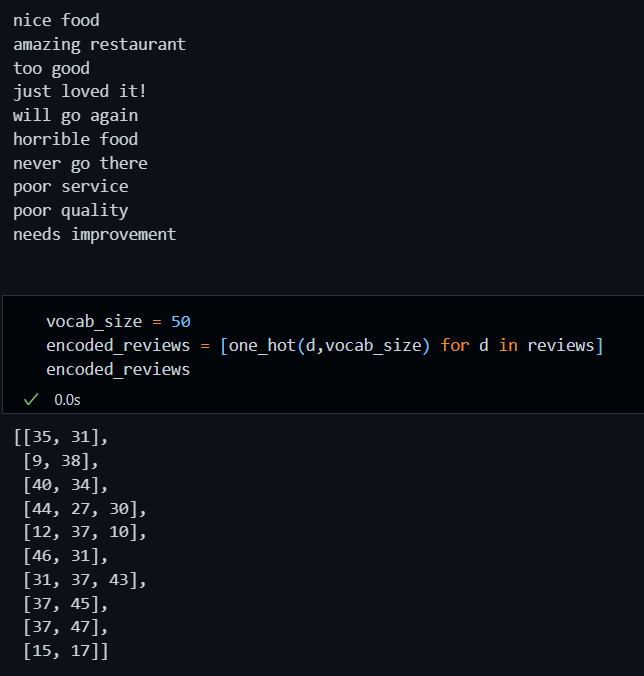

Look here at the word nice it got the number 35 and the word amazing got 9 so lets check it out

In [59]:
weights[35],weights[9]

(array([ 0.06008631,  0.07495546, -0.09706304, -0.09019239], dtype=float32),
 array([ 0.06221096,  0.03997479, -0.0183009 , -0.02481999], dtype=float32))

Our dataset was very small that why these words are not that close but if you run it on a huge dataset then you will get similar vectors for similar words